In [1]:
import mlrun

In [2]:
# Define the link to the project source in git
git_source = 'git://github.com/yevgenykhazan/mlrun.git#my_git_project'

In [3]:
#Load the project from the Git URL, specified by a new name (ci-cd-load) and put it in the project_context directory
project = mlrun.load_project(name='ci-cd-load',context='./project_context',url = git_source,clone=True)
# Alternaticely pull the latest code from git with project.pull("my_git_project")  

In [4]:
# project.set_source(source=git_source,pull_at_runtime=True)

In [5]:
# Check that the project loaded properly
# print(project.to_yaml())

In [6]:
# Before running the main workflow we need to prepare the dataset and model arguments
dataset = project.get_artifact('data')
model = project.get_artifact('model')

In [7]:
# df = dataset.to_dataitem().as_df()

In [8]:
# fetch_data_run = project.run_function('fetch_data',inputs={'dataset': dataset.uri})

In [9]:
data_url = 'https://s3.wasabisys.com/iguazio/data/iris/iris.data.raw.csv'

In [10]:
'''
trainer_run = project.run_function("trainer",
        inputs={"dataset": data_url},
        params = {
            "model_class": "sklearn.ensemble.RandomForestClassifier",
            "train_test_split_size": 0.2,
            "label_columns": "label",
            "model_name":'iris_model'}, handler='train')
'''

'\ntrainer_run = project.run_function("trainer",\n        inputs={"dataset": data_url},\n        params = {\n            "model_class": "sklearn.ensemble.RandomForestClassifier",\n            "train_test_split_size": 0.2,\n            "label_columns": "label",\n            "model_name":\'iris_model\'}, handler=\'train\')\n'

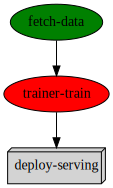

uid,start,state,name,parameters,results
...641909fc,Feb 14 11:34:34,error,trainer-train,model_class=sklearn.ensemble.RandomForestClassifiertrain_test_split_size=0.2label_columns=labelmodel_name=iris_model,
...9776a1a7,Feb 14 11:33:51,completed,fetch-data,,label_column=label


RuntimeError: Pipeline run status Failed

In [11]:
project.run("main", arguments={'dataset_uri': dataset.uri, 'model_name': "iris_model"},watch=True)  # run the workflow "main"